In [7]:

import pandas as pd
# %%
choice_df = pd.read_csv('Terms_of_Use/choice_cut.csv')
question_df = pd.read_csv('Terms_of_Use/question_cut.csv')
raw_data_df = pd.read_csv('Terms_of_Use/raw_data_cut.csv')


# %%



In [9]:
import json
import pandas as pd

choice_df.to_csv('choice_cut.csv',index=False)
question_df.to_csv('question_cut.csv',index=False)
raw_data_df.to_csv('raw_data_cut.csv',index=False)
with open('subquestion_dict.json', 'r') as f:
    subquestion_dict = json.load(f)
with open('choice_dict.json', 'r') as f:
    choice_dict = json.load(f)


In [195]:
def get_choice_and_question_text(single_lines, question_df, choice_df):
    answer = []
    for j in range(1,single_lines.shape[1]):
        for i in range(22):

            single_line = single_lines.iloc[:,j]
            sub_question_id = single_lines["SubQuestionID"].loc[i]
            choice_id = single_line[i]

            # Find the corresponding QuestionText

            question_text = question_df.loc[question_df['SubQuestionID'] == sub_question_id, 'QuestionText'].values[0]

            # Get the QuestionID for the SubQuestionID
            question_id = question_df.loc[question_df['SubQuestionID'] == sub_question_id, 'QuestionID'].values[0]


            if question_id != "AGE":
            # Find all ChoiceText for the QuestionID
                choice_text = choice_df.loc[(choice_df['QuestionID'] == question_id) & (choice_df['ChoiceID'] == choice_id), 'ChoiceText'].values[0]
            else:
                choice_text = choice_id
            # Print the result
            answer.append([question_text, choice_text])


In [32]:
question_df = pd.read_csv('question_cut.csv')
def create_subquestion_dict(question_df):
    subquestion_dict = {}
    for index, row in question_df.iterrows():
        sub_question_id = row['SubQuestionID']
        question_id = row['QuestionID']
        question_text = row['QuestionText']
        
        # SubQuestionIDをキーとして、(QuestionID, QuestionText)のタプルを値とする辞書を作成
        subquestion_dict[sub_question_id] = (question_id, question_text)
    
    return subquestion_dict

# question_dfを引数として関数を呼び出し、結果を表示
subquestion_dict = create_subquestion_dict(question_df)
print(subquestion_dict)
import json
with open('subquestion_dict.json', 'w') as f:
    json.dump(subquestion_dict, f, indent=4)


{'Q6S1': ('Q6', 'The government should allow mass gatherings now'), 'Q6S2': ('Q6', 'The government should continue to request self-restraint of mass gatherings'), 'Q6S3': ('Q6', 'The government should limit movement in addition to mass gatherings'), 'Q7S1': ('Q7', 'Extraverted, enthusiastic.'), 'Q7S2': ('Q7', 'Critical, quarrelsome.'), 'Q7S3': ('Q7', 'Dependable, self-disciplined.'), 'Q7S4': ('Q7', 'Anxious, easily upset.'), 'Q7S5': ('Q7', 'Open to new experiences, complex.'), 'Q7S6': ('Q7', 'Reserved, quiet.'), 'Q7S7': ('Q7', 'Sympathetic, warm.'), 'Q7S8': ('Q7', 'Disorganized, careless.'), 'Q7S9': ('Q7', 'Calm, emotionally stable.'), 'Q7S10': ('Q7', 'Conventional, uncreative.'), 'Q8': ('Q8', 'DRINK'), 'Q9': ('Q9', 'SMOKE'), 'AGE': ('AGE', 'AGE'), 'SEX': ('SEX', 'SEX'), 'MARRIED': ('MARRIED', 'MARRIED'), 'UNIV': ('UNIV', 'GRADUATE UNIVERSITY'), 'CHILD': ('CHILD', 'CHILD'), 'WORK': ('WORK', 'WORK'), 'HINCOME': ('HINCOME', 'HOUSE INCOME')}


In [70]:
def create_choice_dict(choice_df):
    choice_dict = {}
    for index, row in choice_df.iterrows():
        question_id = row['QuestionID']
        choice_id = row['ChoiceID']
        choice_text = row['ChoiceText']
        
        # QuestionIDをキーとして、{ChoiceID: ChoiceText}を値とする辞書を作成
        if question_id not in choice_dict:
            choice_dict[question_id] = {}
        choice_dict[question_id][choice_id] = choice_text
    
    return choice_dict
# choice_dfを引数として関数を呼び出し、結果を表示
choice_dict = create_choice_dict(choice_df)
print(choice_dict)

{'Q6': {1.0: 'Agree', 2.0: 'Relatively agree', 3.0: 'Neither', 4.0: 'Relatively disagree', 5.0: 'Disagree', 6.0: 'Do not know'}, 'Q7': {1.0: 'Agree strongly', 2.0: 'Agree', 3.0: 'Disagree', 4.0: 'Disagree strongly'}, 'Q8': {1.0: 'Never drink', 2.0: 'I used to drink, but I quitted', 3.0: 'Few times per month', 4.0: '1-2 times per week', 5.0: '3-6 times per week', 6.0: 'Every day'}, 'Q9': {1.0: 'Every day', 2.0: 'Sometimes', 3.0: 'Used to smoke but do not now', 4.0: 'Never smoked'}, 'AGE': {nan: '(continuous number)'}, 'SEX': {1.0: 'Male', 2.0: 'Female'}, 'MARRIED': {1.0: 'Married', 2.0: 'Not married'}, 'UNIV': {1.0: 'Yes', 2.0: 'No'}, 'CHILD': {1.0: 'Yes', 2.0: 'No'}, 'WORK': {1.0: 'Regular employee', 2.0: 'Non-regular employee', 3.0: 'Self-employed and others', 4.0: 'Not working'}, 'HINCOME': {1.0: 'Less than 2,000K JPY', 2.0: '2,000-3,999K JPY', 3.0: '4,000-5,999K JPY', 4.0: '6,000-6,999K JPY', 5.0: '8,000-8,999K JPY', 6.0: '10,000-11,999K JPY', 7.0: '12,000-14,999K JPY', 8.0: '15,000

NameError: name 'single_line' is not defined

In [213]:

def get_choice_and_question_text(single_lines, subquestion_dict, choice_dict):
    answer_dict = {}
    for j in range(1, single_lines.shape[0]):
        answer = {}
        for i in range(22):
            single_line = single_lines.iloc[j]
            sub_question_id = single_lines.columns[i]
            #print(sub_question_id)
            choice_id = str(single_line[i])
            #print(choice_id)

            # Find the corresponding QuestionText and QuestionID using subquestion_dict
            question_id, question_text = subquestion_dict[sub_question_id]
            #print(question_id, question_text)

            if question_id == "AGE":
                # Find all ChoiceText for the QuestionID using choice_dict
                #print(question_id,choice_id)
                choice_text = choice_id
            else:
                choice_text = choice_dict[question_id][choice_id]

            # Append the result
            answer[question_text]= choice_text
        answer_dict[j] = answer
    return answer_dict


In [197]:

# %%
#import libraries
import os
from dotenv import load_dotenv
from openai import OpenAI
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import ast
import json
from collections import Counter


client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY")
    )
pd.set_option('display.max_colwidth', None)

# %%
def generate_completion(role, prompt,questionaire):
    response = client.chat.completions.create(
        model="gpt-4o",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},\n{questionaire}"}
        ],
        temperature=0.7,
        max_tokens=1000,
        )
    return response

# %%
role=""

#make prompt
prompt="Understanding Your Attitude Towards Covid-19 Prevention\n\
We invite you to participate in this questionnaire to help us gain insights into your attitudes and behaviors regarding Covid-19 prevention. Your responses will be invaluable in shaping effective public health strategies.\n\
Instructions:\n\
・Carefully consider each question independently.\n\
・Select the option that best reflects your current situation and personal views.\n\
・Answer each question based solely on your own experiences and beliefs.\n\
Answer Format Example:\n\
Go shopping everyday\n\
['1.Very true']\n\
Thank you for your participation."

#make options
options_list=["1.Very true","2.True","3.Neither","4.Not true","5.Not at all"]
questions_list=["Avoid a poorly-ventilated closed space",
"Avoid large gatherings",
"Avoid conversations or shouting in close proximity",
"Avoid places where items 1-3 above overlap",
"Do not go to dinner with friends",
"Do not go to mass gatherings",
"Participate in virtual events using online tools",
"Undertake frequent handwashing",
"Undertake cough etiquette (use handkerchiefs or sleeves instead of hands)",
"Disinfect things around",
"Avoid going out when you have a cold",
"Avoid going to clinic even when having a cold symptom",
"Prepare consultation and transportation methods for when you feel ill",
"Always wear a surgical-style mask when going out",
"Stockpile surgical-style masks",
"Stockpile food, toilet paper, tissue paper, etc.",
"Avoid contact with younger people",
"Avoid contact with older people",
"Get sufficient rest and sleep",
"Eat a nutritious diet",
"Do exercise such as jogging or exercise using DVD"]

#make questionaire
questionaire="Have you ever conducted anything to prevent novel coronavirus infections or outbreaks?\n\n"
for i in range(len(questions_list)):
    questionaire+=f"{questions_list[i]}\n{options_list}\n\n"

def get_answer(content) -> dict[str:str]:
    pattern = re.compile(r"\['(.*?)'\]")
    answers = pattern.findall(content)
    answers_dict = dict(zip(questions_list,answers))
    return answers_dict




In [209]:
raw_data_df.to_csv('raw_data_cut.csv',index=False)

In [208]:
raw_data_df.columns = raw_data_df.iloc[0]  # 一行目をカラム名に設定
raw_data_df = raw_data_df[1:]  # 一行目を除外してデータを更新
raw_data_df.head()

,Q6S1,Q6S2,Q6S3,Q7S1,Q7S2,Q7S3,Q7S4,Q7S5,Q7S6,Q7S7,...,Q7S10,Q8,Q9,AGE,SEX,MARRIED,UNIV,CHILD,WORK,HINCOME
1,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,4.0,1.0,...,4.0,3.0,1.0,7.0,1.0,2.0,1.0,1.0,1.0,10.0
2,5.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,...,2.0,1.0,3.0,10.0,1.0,2.0,2.0,2.0,2.0,4.0
3,5.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,...,2.0,1.0,4.0,8.0,2.0,2.0,1.0,2.0,4.0,0
4,3.0,2.0,3.0,4.0,2.0,4.0,2.0,3.0,1.0,3.0,...,2.0,1.0,4.0,8.0,1.0,1.0,2.0,2.0,2.0,2.0
5,5.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,6.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,5.0


In [211]:
single

,Q6S1,Q6S2,Q6S3,Q7S1,Q7S2,Q7S3,Q7S4,Q7S5,Q7S6,Q7S7,...,Q7S10,Q8,Q9,AGE,SEX,MARRIED,UNIV,CHILD,WORK,HINCOME
1396,3.0,3.0,3.0,4.0,4.0,4.0,2.0,2.0,3.0,3.0,...,2.0,4.0,4.0,9.0,1.0,2.0,2.0,1.0,1.0,0.0
543,5.0,1.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,1.0,...,2.0,5.0,4.0,8.0,2.0,2.0,1.0,2.0,1.0,7.0
9904,2.0,2.0,4.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,...,2.0,6.0,3.0,9.0,2.0,2.0,2.0,2.0,2.0,0.0
1941,3.0,3.0,3.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,...,4.0,1.0,1.0,9.0,1.0,1.0,2.0,2.0,3.0,2.0
5964,1.0,1.0,1.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,1.0,5.0,1.0,9.0,2.0,1.0,2.0,2.0,2.0,1.0
9713,3.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,...,4.0,1.0,4.0,5.0,1.0,1.0,2.0,2.0,4.0,0.0
8089,5.0,1.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,...,2.0,3.0,4.0,3.0,2.0,1.0,1.0,2.0,2.0,10.0
6887,1.0,1.0,1.0,4.0,4.0,3.0,2.0,4.0,1.0,1.0,...,1.0,5.0,3.0,8.0,1.0,2.0,2.0,2.0,1.0,4.0
7628,5.0,1.0,1.0,3.0,4.0,3.0,2.0,3.0,4.0,2.0,...,2.0,4.0,4.0,10.0,2.0,2.0,2.0,2.0,4.0,1.0
9306,5.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,...,3.0,3.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,10.0


In [215]:
with open('subquestion_dict.json', 'r') as f:
    subquestion_dict = json.load(f)
with open('choice_dict.json', 'r') as f:
    choice_dict = json.load(f)

raw_data_df=pd.read_csv('raw_data_cut.csv')
# Assuming raw_data_df, subquestion_dict, and choice_dict are already defined
raw_data_df = raw_data_df.fillna("0")

np.random.seed(42)
single = raw_data_df.sample(50)

answer_dict = get_choice_and_question_text(single, subquestion_dict, choice_dict)
print(answer_dict)


{1: {'The government should allow mass gatherings now': 'Disagree', 'The government should continue to request self-restraint of mass gatherings': 'Agree', 'The government should limit movement in addition to mass gatherings': 'Neither', 'Extraverted, enthusiastic.': 'Agree', 'Critical, quarrelsome.': 'Disagree strongly', 'Dependable, self-disciplined.': 'Disagree strongly', 'Anxious, easily upset.': 'Disagree', 'Open to new experiences, complex.': 'Disagree', 'Reserved, quiet.': 'Disagree strongly', 'Sympathetic, warm.': 'Agree strongly', 'Disorganized, careless.': 'Disagree', 'Calm, emotionally stable.': 'Disagree', 'Conventional, uncreative.': 'Agree', 'DRINK': '3-6 times per week', 'SMOKE': 'Never smoked', 'AGE': '8.0', 'SEX': 'Female', 'MARRIED': 'Not married', 'GRADUATE UNIVERSITY': 'Yes', 'CHILD': 'No', 'WORK': 'Regular employee', 'HOUSE INCOME': '12,000-14,999K JPY'}, 2: {'The government should allow mass gatherings now': 'Relatively agree', 'The government should continue to r

In [216]:
data = {}
for i in range(len(answer_dict)):
    role = "You are the person with the following attributes."+str(answer_dict[i+1])
    response = generate_completion(role,prompt,questionaire)
    content = response.choices[0].message.content
    answers = get_answer(content)
    data[i+1] = answers
df_data = pd.DataFrame(data)


,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Avoid a poorly-ventilated closed space,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,2.True,3.Neither,1.Very true,2.True,1.Very true,1.Very true,3.Neither
Avoid large gatherings,1.Very true,2.True,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,1.Very true,3.Neither,2.True,2.True,1.Very true,1.Very true,3.Neither
Avoid conversations or shouting in close proximity,2.True,2.True,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,2.True,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,2.True,3.Neither,2.True,2.True,1.Very true,1.Very true,3.Neither
Avoid places where items 1-3 above overlap,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,1.Very true,3.Neither,1.Very true,2.True,1.Very true,1.Very true,3.Neither
Do not go to dinner with friends,3.Neither,2.True,1.Very true,2.True,2.True,1.Very true,2.True,2.True,2.True,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,2.True,1.Very true,3.Neither,3.Neither,3.Neither,1.Very true,2.True,3.Neither


In [159]:
answer_df = pd.DataFrame.from_dict(answer_dict)
display(answer_df)

,1,2,3,4,5,6,7,8,9
The government should allow mass gatherings now,Agree,Disagree,Disagree,Neither,Disagree,Disagree,Disagree,Disagree,Relatively agree
The government should continue to request self-restraint of mass gatherings,Agree,Relatively agree,Agree,Relatively agree,Relatively agree,Agree,Agree,Agree,Agree
The government should limit movement in addition to mass gatherings,Agree,Relatively agree,Agree,Neither,Relatively agree,Agree,Disagree,Neither,Neither
"Extraverted, enthusiastic.",Agree strongly,Agree strongly,Agree,Disagree strongly,Disagree,Disagree strongly,Disagree strongly,Agree,Disagree strongly
"Critical, quarrelsome.",Disagree strongly,Disagree,Agree strongly,Agree,Agree,Disagree strongly,Disagree,Disagree,Disagree strongly
"Dependable, self-disciplined.",Agree strongly,Disagree,Agree,Disagree strongly,Agree,Agree,Disagree,Disagree,Agree
"Anxious, easily upset.",Agree strongly,Disagree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Agree strongly
"Open to new experiences, complex.",Agree,Disagree,Agree strongly,Disagree,Agree,Disagree,Disagree strongly,Disagree,Disagree strongly
"Reserved, quiet.",Disagree strongly,Agree,Agree,Agree strongly,Agree,Agree strongly,Disagree,Disagree,Disagree
"Sympathetic, warm.",Agree strongly,Agree,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree


In [160]:
# pd.mergeを使用して、インデックスを基にしてdf1とdf2を結合する
merged_df = pd.concat([answer_df, df_data])
display(merged_df[21:])
merged_df = merged_df.T

,1,2,3,4,5,6,7,8,9
HOUSE INCOME,Do not know,"6,000-6,999K JPY",unanswered,"2,000-3,999K JPY","8,000-8,999K JPY","10,000-11,999K JPY","Less than 2,000K JPY",unanswered,"6,000-6,999K JPY"
Avoid a poorly-ventilated closed space,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true
Avoid large gatherings,1.Very true,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,2.True
Avoid conversations or shouting in close proximity,1.Very true,1.Very true,2.True,2.True,1.Very true,1.Very true,1.Very true,1.Very true,2.True
Avoid places where items 1-3 above overlap,1.Very true,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,2.True
Do not go to dinner with friends,2.True,2.True,1.Very true,2.True,1.Very true,1.Very true,2.True,1.Very true,3.Neither
Do not go to mass gatherings,1.Very true,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,3.Neither
Participate in virtual events using online tools,1.Very true,2.True,2.True,2.True,1.Very true,1.Very true,2.True,1.Very true,3.Neither
Undertake frequent handwashing,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,2.True,1.Very true,2.True
Undertake cough etiquette (use handkerchiefs or sleeves instead of hands),1.Very true,1.Very true,2.True,2.True,1.Very true,1.Very true,2.True,1.Very true,2.True


In [137]:
import pandas as pd
# aggregate data
def aggregate_data(df_data):
    global questions_list, options_list
    #aggregate data
    data_aggregate =[]
    for question in questions_list:
        for option in options_list:
            count = df_data.loc[question].str.contains(option).sum()
            data_aggregate.append({"question":question,"option":option,"count":count})
    print(data_aggregate)
    df_aggregate = pd.DataFrame(data_aggregate)

    # Pivot the DataFrame
    df_aggregate_pivot = df_aggregate.pivot(index='question', columns='option', values='count')

    # Fill NaN with 0 (if any)
    df_aggregate_pivot = df_aggregate_pivot.fillna(0)
    df_aggregate_pivot = df_aggregate_pivot.loc[questions_list]
    return df_aggregate_pivot

def separate_dataframes(df_data, filter_list, filter_column):
    """
    Separate the DataFrame based on the tuples of values in the specified column.

    Parameters:
    df_data (pd.DataFrame): The input DataFrame.
    filter_list (list of tuples): The list of tuples of values to filter by.
    filter_column (str): The column to filter on.

    Returns:
    dict: A dictionary of DataFrames filtered by the specified column values.
    """
    df_dict = {}
    for idx, value_tuple in enumerate(filter_list):
        # Ensure we are using tuples for filtering
        df_filtered = df_data[df_data[filter_column].isin(value_tuple)]
        df_dict[f'df_{idx}'] = df_filtered
    return df_dict


def aggregate_dataframes(df_data_dict):

    # Create an iterator from the dictionary items
    dict_iterator = iter(df_data_dict.items())

    # Retrieve values one by one
    try:
        key,value = next(dict_iterator)
        value = value
        df_aggregate_1 = aggregate_data(value)

        key,value = next(dict_iterator)
        value = value
        df_aggregate_2 = aggregate_data(value)

        # Continue calling next(dict_iterator) as needed
    except StopIteration:
        print("No more items in the dictionary.")
    return df_aggregate_1,df_aggregate_2

def calculate_ratio(df_aggregate,attribute):
    df_aggregate[f"Ratio of true:{attribute}"] = round(((df_aggregate["1.Very true"] + df_aggregate["2.True"])*100/df_aggregate.sum(axis=1)),2)
    return df_aggregate[f"Ratio of true:{attribute}"]

def TablePlot(df,w,h):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(
        df.values,
        colLabels = df.columns,
        rowLabels=df.index,
        loc = 'center',
        bbox=[0,0,1,1]
    )
    plt.show()



In [232]:
def aggregate_data_dict(data_dict):
    global questions_list, options_list
    # Aggregate data
    data_aggregate = {}
    for question in questions_list:
        data_aggregate[question] = {}
        for option in options_list:
            count = sum(1 for ans in data_dict.values() if ans.get(question) == option)
            data_aggregate[question][option] = count

    return data_aggregate

def separate_data_dicts(data_dict, filter_list, filter_key):
    """
    Separate the data based on the tuples of values in the specified key.

    Parameters:
    data_dict (dict): The input dictionary.
    filter_list (list of tuples): The list of tuples of values to filter by.
    filter_key (str): The key to filter on.

    Returns:
    dict: A dictionary of dictionaries filtered by the specified key values.
    """
    dict_of_dicts = {}
    for idx, value_tuple in enumerate(filter_list):
        filtered_dict = {k: v for k, v in data_dict.items() if v[filter_key] in value_tuple}
        dict_of_dicts[f'dict_{idx}'] = filtered_dict
    return dict_of_dicts

def aggregate_data_dicts(data_dict_dict):
    # Create an iterator from the dictionary items
    dict_iterator = iter(data_dict_dict.items())

    aggregated_dicts = {}
    try:
        while True:
            key, value = next(dict_iterator)
            aggregated_dicts[key] = aggregate_data(value)
    except StopIteration:
        print("No more items in the dictionary.")
    return aggregated_dicts

def calculate_ratio(df_aggregate,attribute):
    df = pd.DataFrame()
    df[f"Ratio of true:{attribute}"] = round(((df_aggregate["1.Very true"] + df_aggregate["2.True"])*100/df_aggregate.sum(axis=1)),2)
    return df

def TablePlot(df,w,h):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(
        df.values,
        colLabels = df.columns,
        rowLabels=df.index,
        loc = 'center',
        bbox=[0,0,1,1]
    )
    plt.show()

In [234]:
print(data)
aggregate_dict = aggregate_data_dict(data)
print(aggregate_dict)

{1: {'Avoid a poorly-ventilated closed space': '1.Very true', 'Avoid large gatherings': '1.Very true', 'Avoid conversations or shouting in close proximity': '2.True', 'Avoid places where items 1-3 above overlap': '1.Very true', 'Do not go to dinner with friends': '3.Neither', 'Do not go to mass gatherings': '1.Very true', 'Participate in virtual events using online tools': '2.True', 'Undertake frequent handwashing': '1.Very true', 'Undertake cough etiquette (use handkerchiefs or sleeves instead of hands)': '2.True', 'Disinfect things around': '2.True', 'Avoid going out when you have a cold': '2.True', 'Avoid going to clinic even when having a cold symptom': '4.Not true', 'Prepare consultation and transportation methods for when you feel ill': '3.Neither', 'Always wear a surgical-style mask when going out': '1.Very true', 'Stockpile surgical-style masks': '2.True', 'Stockpile food, toilet paper, tissue paper, etc.': '2.True', 'Avoid contact with younger people': '3.Neither', 'Avoid cont

In [323]:
aggregate_dict = aggregate_data_dict(data)
print(aggregate_dict)
df_aggregate = pd.DataFrame.from_dict(aggregate_dict).T
display(df_aggregate)
df_calculate = calculate_ratio(df_aggregate,"all")
TablePlot(df_calculate,10,10)

AttributeError: 'list' object has no attribute 'get'

In [ ]:
def merge_dicts(dict1, dict2):
    # 結合する辞書
    combined_dict = {}

    # キーのユニオンを取り、各キーに対して操作を実行
    for key in dict1.keys() | dict2.keys():
        if key in dict1 and key in dict2:
            combined_dict[key] = {**dict1[key],**dict2[key]}
    return combined_dict

merged_dict = merge_dicts(data, answer_dict)
age_filter = [["3.0","4.0","5.0","6.0"], ["7.0","8.0","9.0","10.0","11.0"]]
separated_dict=separate_data_dicts(merged_dict, age_filter, "AGE")
df_merged_dict = pd.DataFrame.from_dict(merged_dict)
display(df_merged_dict)

In [320]:
df_merged_dict.to_csv('df_merged_dict.csv',index=False)

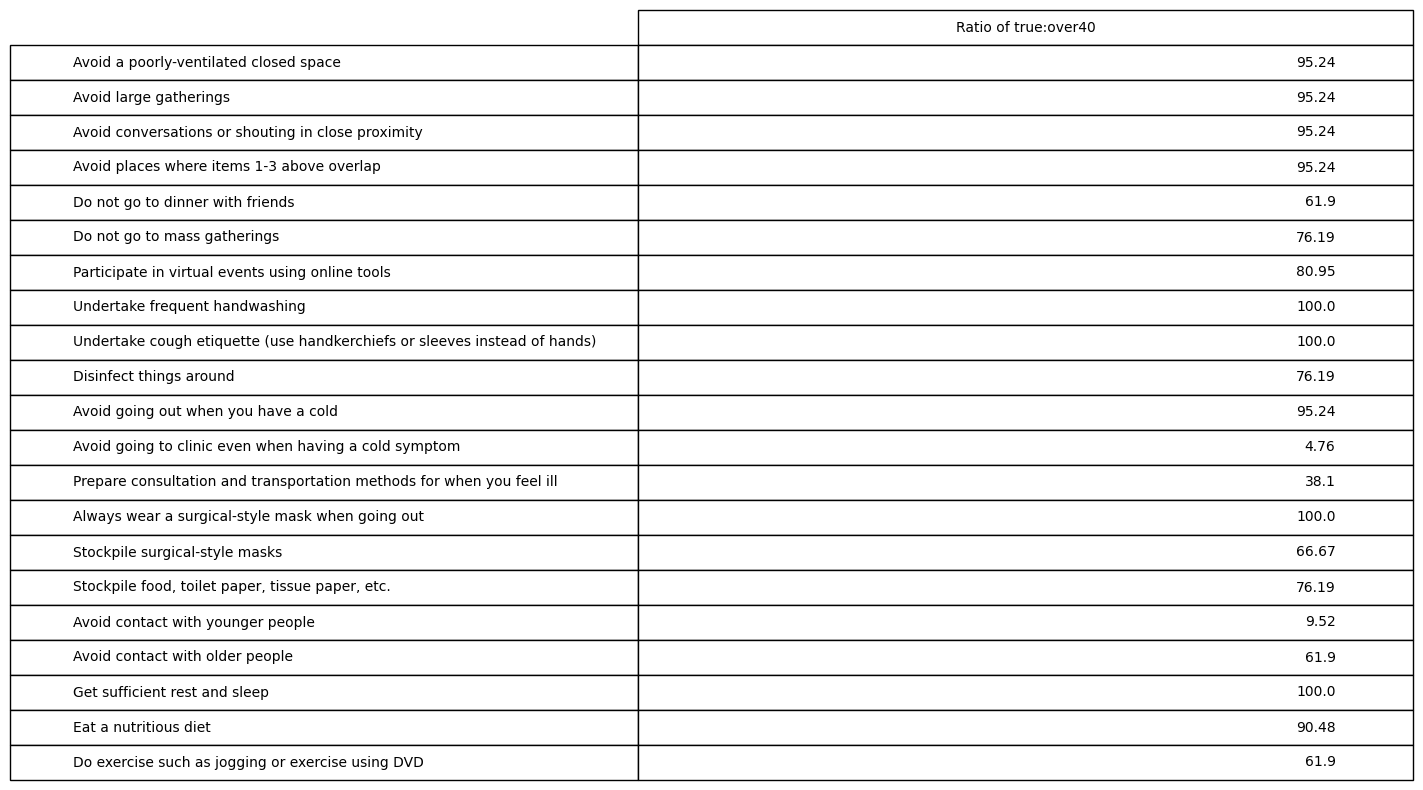

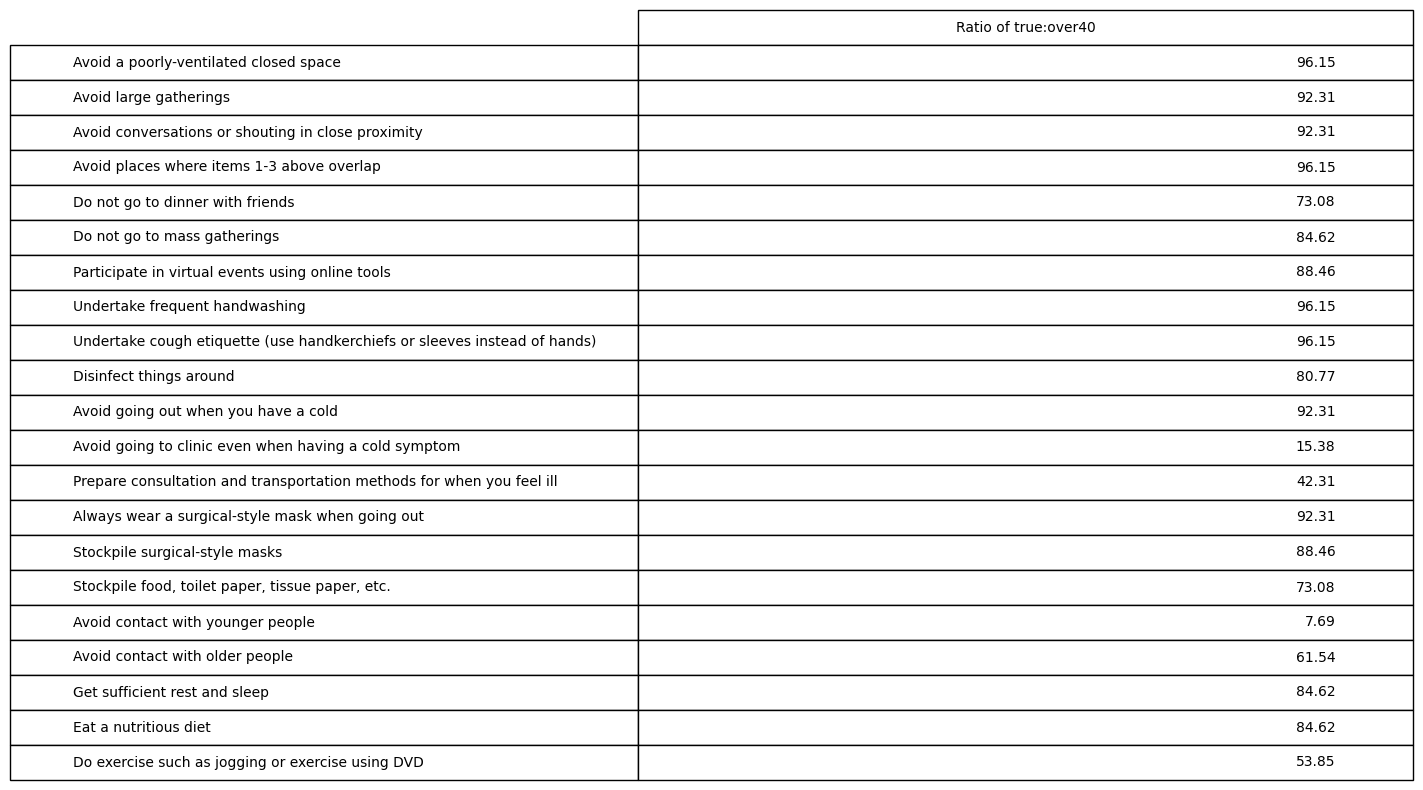

In [322]:
for idx in range(len(separated_dict)):
    aggregate_dict = aggregate_data_dict(separated_dict[f'dict_{idx}'] )
    #print(aggregate_dict)
    df_aggregate = pd.DataFrame.from_dict(aggregate_dict).T
    #display(df_aggregate)
    df_calculate = calculate_ratio(df_aggregate,"over40")
    TablePlot(df_calculate,10,10)

In [250]:
df_merged_dict[1]

Avoid a poorly-ventilated closed space                                                1.Very true
Avoid large gatherings                                                                1.Very true
Avoid conversations or shouting in close proximity                                         2.True
Avoid places where items 1-3 above overlap                                            1.Very true
Do not go to dinner with friends                                                        3.Neither
Do not go to mass gatherings                                                          1.Very true
Participate in virtual events using online tools                                           2.True
Undertake frequent handwashing                                                        1.Very true
Undertake cough etiquette (use handkerchiefs or sleeves instead of hands)                  2.True
Disinfect things around                                                                    2.True
Avoid going out when

In [282]:
df_merged_dict.loc["Avoid the three Cs"] = df_merged_dict.loc["Avoid places where items 1-3 above overlap"].apply(
    lambda x: 1 if x in ["4.Not true","5.Not at all"] else 0
)
df_merged_dict.loc["Binary Smoke"] = df_merged_dict.loc["SMOKE"].apply(
    lambda x: 1 if x in ["Every day","Sometimes"] else 0
)
df_merged_dict.loc["Binary Drink"] = df_merged_dict.loc["DRINK"].apply(
    lambda x: 1 if x in ["3-6 times per week","Every day"] else 0
)


In [283]:
display(df_merged_dict)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Avoid a poorly-ventilated closed space,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,2.True,3.Neither,1.Very true,2.True,1.Very true,1.Very true,3.Neither
Avoid large gatherings,1.Very true,2.True,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,1.Very true,3.Neither,2.True,2.True,1.Very true,1.Very true,3.Neither
Avoid conversations or shouting in close proximity,2.True,2.True,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,2.True,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,2.True,3.Neither,2.True,2.True,1.Very true,1.Very true,3.Neither
Avoid places where items 1-3 above overlap,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,1.Very true,3.Neither,1.Very true,2.True,1.Very true,1.Very true,3.Neither
Do not go to dinner with friends,3.Neither,2.True,1.Very true,2.True,2.True,1.Very true,2.True,2.True,2.True,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,2.True,1.Very true,3.Neither,3.Neither,3.Neither,1.Very true,2.True,3.Neither
Do not go to mass gatherings,1.Very true,3.Neither,1.Very true,2.True,2.True,1.Very true,2.True,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,1.Very true,3.Neither,2.True,3.Neither,1.Very true,1.Very true,3.Neither
Participate in virtual events using online tools,2.True,2.True,1.Very true,3.Neither,2.True,1.Very true,2.True,2.True,2.True,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",2.True,2.True,2.True,3.Neither,2.True,2.True,1.Very true,2.True,3.Neither
Undertake frequent handwashing,1.Very true,1.Very true,1.Very true,2.True,1.Very true,1.Very true,1.Very true,1.Very true,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,1.Very true,3.Neither,1.Very true,2.True,1.Very true,1.Very true,2.True
Undertake cough etiquette (use handkerchiefs or sleeves instead of hands),2.True,2.True,1.Very true,2.True,1.Very true,1.Very true,1.Very true,2.True,1.Very true,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",1.Very true,1.Very true,2.True,3.Neither,1.Very true,2.True,1.Very true,1.Very true,2.True
Disinfect things around,2.True,2.True,1.Very true,3.Neither,1.Very true,1.Very true,1.Very true,2.True,2.True,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",...,"1.Very true', '2.True', '3.Neither', '4.Not true', '5.Not at all",2.True,2.True,2.True,3.Neither,1.Very true,2.True,1.Very true,1.Very true,3.Neither


In [268]:
# prefixとdrop_firstを使用してダミー変数を生成
dummies_0 = pd.get_dummies(df_merged_dict.loc["AGE"])
dummies_1 = pd.get_dummies(df_merged_dict.loc["SEX"])
dummies_2 = pd.get_dummies(df_merged_dict.loc["MARRIED"])
dummies_3 = pd.get_dummies(df_merged_dict.loc["GRADUATE UNIVERSITY"]).T
dummies_4 = pd.get_dummies(df_merged_dict.loc["CHILD"]).T
dummies_5 = pd.get_dummies(df_merged_dict.loc["WORK"]).T
dummies_6 = pd.get_dummies(df_merged_dict.loc["HOUSE INCOME"]).T

# 複数のダミー変数のデータフレームを結合
combined_dummies = pd.concat([dummies_0, dummies_1, dummies_2, dummies_3, dummies_4, dummies_5, dummies_6])


In [272]:
display(combined_dummies)
# ブール値を整数値に変換する関数
def bool_to_int(value):
    return int(value)

# データフレームの各要素に関数を適用
converted_dummies = combined_dummies.applymap(bool_to_int)

# 変換後のデータフレームを表示
display(converted_dummies)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
10.0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3.0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4.0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
5.0,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6.0,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,True
7.0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8.0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9.0,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Female,True,True,False,True,False,True,False,True,True,True,...,False,True,False,False,False,False,False,True,True,False
Male,False,False,True,False,True,False,True,False,False,False,...,True,False,True,True,True,True,True,False,False,True


,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
10.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5.0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8.0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9.0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Female,1,1,0,1,0,1,0,1,1,1,...,0,1,0,0,0,0,0,1,1,0
Male,0,0,1,0,1,0,1,0,0,0,...,1,0,1,1,1,1,1,0,0,1


In [279]:
converted_dummies.loc["20-29"] = converted_dummies.loc["3.0"] + converted_dummies.loc["4.0"]
converted_dummies.loc["30-39"] = converted_dummies.loc["5.0"] + converted_dummies.loc["6.0"]
converted_dummies.loc["40-49"] = converted_dummies.loc["7.0"] + converted_dummies.loc["8.0"]
converted_dummies.loc["50-59"] = converted_dummies.loc["9.0"] + converted_dummies.loc["10.0"]
#converted_dummies.loc["60-64"] = converted_dummies.loc["11.0"]

In [281]:
# 複数の列をデータフレームから取り除く
cleaned_df = converted_dummies.drop(["Female","3.0","4.0","5.0","6.0","7.0","8.0","9.0","10.0","No","Do not know","Unanswered"], axis=0)

display(cleaned_df)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Male,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
Married,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
Not married,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Yes,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Non-regular employee,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Not working,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Regular employee,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
Self-employed and others,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"10,000-11,999K JPY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
df_merged_dict.iloc[-3:]

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Avoid the three Cs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Binary Smoke,0,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,0,0
Binary Drink,1,1,0,1,0,0,1,0,0,1,...,1,1,0,1,0,0,0,0,0,0


In [291]:
df_odds = pd.concat([df_merged_dict.iloc[-3:],cleaned_df])
display(df_odds.astype(int))

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Avoid the three Cs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Binary Smoke,0,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,0,0
Binary Drink,1,1,0,1,0,0,1,0,0,1,...,1,1,0,1,0,0,0,0,0,0
Male,0,0,1,0,1,0,1,0,0,0,...,1,0,1,1,1,1,1,0,0,1
Married,0,0,1,1,1,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,1
Not married,1,1,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,1,1,0,0
Yes,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
Yes,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
Non-regular employee,0,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
Not working,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [292]:
# 7行目のインデックス名を新しい名前に変更する
# ここでは、0から始まるインデックスを想定しているため、7行目のインデックスは6になります
new_index = df_odds.index.tolist()  # 現在のインデックスをリストとして取得
new_index[6] = 'University'  # 7行目のインデックス名を変更
new_index[7] = 'Graduate'
df_odds.index = new_index  # 更新されたインデックスリストをDataFrameに適用

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Avoid the three Cs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Binary Smoke,0,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,0,0
Binary Drink,1,1,0,1,0,0,1,0,0,1,...,1,1,0,1,0,0,0,0,0,0
Male,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
Married,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
Not married,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
University,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Graduate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Non-regular employee,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Not working,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
df_odds = df_odds.astype(int)
display(df_odds)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Avoid the three Cs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Binary Smoke,0,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,0,0
Binary Drink,1,1,0,1,0,0,1,0,0,1,...,1,1,0,1,0,0,0,0,0,0
Male,0,0,1,0,1,0,1,0,0,0,...,1,0,1,1,1,1,1,0,0,1
Married,0,0,1,1,1,1,0,0,1,1,...,1,0,0,1,0,1,0,0,1,1
Not married,1,1,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,1,1,0,0
University,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
Graduate,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
Non-regular employee,0,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
Not working,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [319]:
df_odds.iloc[0].value_counts()

Avoid the three Cs
0    49
Name: count, dtype: int64

In [317]:
def calculate_odds_ratio(df):
    # 結果を格納するためのリスト
    odds_ratios = []
    
    # 一行目のデータを取得
    base_row = df.iloc[0]

    # データフレームの各行に対してループ
    for index, row in df.iterrows():
        # 混同行列の計算
        TP = np.sum((base_row == 1) & (row == 1))
        TN = np.sum((base_row == 0) & (row == 0))
        FP = np.sum((base_row == 0) & (row == 1))
        FN = np.sum((base_row == 1) & (row == 0))
        print(TP,TN,FP,FN)
        # オッズ比の計算（ゼロ除算を避けるための小さな値を追加）
        odds_ratio = (TP * TN + 0.001) / (FP * FN + 0.001)
        odds_ratios.append(odds_ratio)
    
    # オッズ比のリストを返す
    return odds_ratios

# データフレームを用いて関数をテスト
odds_ratios = calculate_odds_ratio(df_odds)
print(odds_ratios)

0 49 0 0
0 39 10 0
0 34 15 0
0 30 19 0
0 24 25 0
0 25 24 0
0 22 27 0
0 40 9 0
0 32 17 0
0 45 4 0
0 22 27 0
0 48 1 0
0 48 1 0
0 46 3 0
0 48 1 0
0 44 5 0
0 42 7 0
0 44 5 0
0 46 3 0
0 45 4 0
0 42 7 0
0 33 16 0
0 38 11 0
0 34 15 0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [316]:
import pandas as pd
import numpy as np

def calculate_odds_ratio(df):
    # 結果を格納するためのリスト
    odds_ratios = []
    
    # 一行目のデータを取得
    base_row = df.iloc[0]
    
    # データフレームの各行に対してループ
    for index, row in df.iterrows():
        # 混同行列の計算
        TP = np.sum((base_row == 1) & (row == 1))
        TN = np.sum((base_row == 0) & (row == 0))
        FP = np.sum((base_row == 0) & (row == 1))
        FN = np.sum((base_row == 1) & (row == 0))
        print(TP,TN,FP,FN)
        # オッズ比の計算（ゼロ除算を避けるための小さな値を追加）
        odds_ratio = (TP * TN + 0.001) / (FP * FN + 0.001)
        odds_ratios.append(odds_ratio)
    
    # オッズ比のリストを返す
    return odds_ratios

# サンプルデータフレームの作成
#data = {'col1': [1, 0, 1, 0], 'col2': [0, 1, 1, 0], 'col3': [1, 0, 0, 1]}
df = pd.DataFrame({'col1': [1, 0, 1, 0], 'col2': [0, 1, 1, 0], 'col3': [1, 0, 0, 1]})
display(df)
# 関数の呼び出し
odds_ratios = calculate_odds_ratio(df)
print(odds_ratios)

,col1,col2,col3
0,1,0,1
1,0,1,0
2,1,1,0
3,0,0,1


2 1 0 0
0 0 1 2
1 0 1 1
1 1 0 1
[2000.9999999999998, 0.0004997501249375313, 0.0009990009990009992, 1000.9999999999999]
